نمایش ۵ ردیف اول دیتاست:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


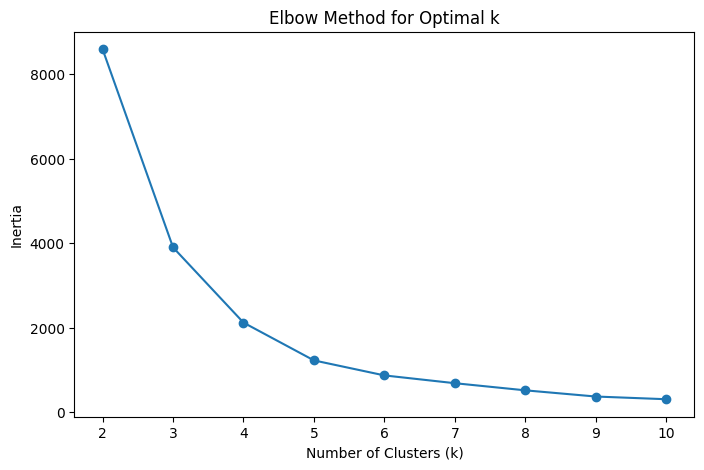


تعداد بهینه خوشه‌ها (k) بر اساس روش البو: 5

معیارهای KNN Regressor:
R^2: 0.1337849088797427
MSE: 1.136942049088978

معیارهای روش پیشنهادی:
R^2: -0.9733839133630506
MSE: 2.590145534403682


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# دریافت دیتاست قیمت خانه‌ها در کالیفرنیا
california_housing = fetch_california_housing()
X = california_housing.data  # ویژگی‌ها
y = california_housing.target  # تارگت (قیمت خانه‌ها)

# تبدیل به DataFrame برای راحتی کار
df = pd.DataFrame(X, columns=california_housing.feature_names)
df['target'] = y


# انتخاب k بهینه با روش البو
inertia = []
k_values = range(2, 11)  # بررسی k از ۲ تا ۱۰

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['target']])
    inertia.append(kmeans.inertia_)

# رسم نمودار البو برای انتخاب k بهینه
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# انتخاب k بهینه بر اساس روش البو (نقطه خمش)
optimal_k = 5  # به‌صورت دستی یا با مشاهده نمودار انتخاب می‌شود
print(f"\nتعداد بهینه خوشه‌ها (k) بر اساس روش البو: {optimal_k}")

# کلاس‌بندی با K-means و k بهینه
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(df[['target']])

# افزودن کلاس‌های K-means به DataFrame
df['target_kmeans'] = y_kmeans

# تقسیم داده‌ها به داده‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# آموزش مدل KNN رگرسیون
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# پیش‌بینی y_knn_pred
y_knn_pred = knn_regressor.predict(X_test)

# محاسبه R^2 و MSE برای KNN
r2_knn = r2_score(y_test, y_knn_pred)
mse_knn = mean_squared_error(y_test, y_knn_pred)
print(f"\nمعیارهای KNN Regressor:")
print(f"R^2: {r2_knn}")
print(f"MSE: {mse_knn}")

# روش پیشنهادی برای پیش‌بینی y_pred
def custom_predict(X_train, X_test, y_train, k=5):
    y_pred = []
    y_train = y_train.astype(int)  # تبدیل y_train به int
    for case in X_test:
        case_classes = []
        for j in range(X_train.shape[1]):  # حلقه روی ویژگی‌ها
            # یافتن k نزدیک‌ترین همسایه برای ویژگی j
            distances = np.abs(X_train[:, j] - case[j])
            nearest_indices = np.argsort(distances)[:k]
            nearest_classes = y_train[nearest_indices]
            # رای‌گیری اکثریت برای ویژگی j
            majority_class = np.argmax(np.bincount(nearest_classes))
            case_classes.append(majority_class)
        # رای‌گیری اکثریت برای همه ویژگی‌ها
        final_class = np.argmax(np.bincount(case_classes))
        y_pred.append(final_class)
    return np.array(y_pred)

# پیش‌بینی y_pred با روش پیشنهادی
y_pred_custom = custom_predict(X_train, X_test, y_train, k=5)

# محاسبه R^2 و MSE برای روش پیشنهادی
r2_custom = r2_score(y_test, y_pred_custom)
mse_custom = mean_squared_error(y_test, y_pred_custom)
print(f"\nمعیارهای روش پیشنهادی:")
print(f"R^2: {r2_custom}")
print(f"MSE: {mse_custom}")